# Loading libraries
Loading the libraries I will need and suppressing the warnings, as per advice from classes.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split 
from sklearn import metrics                           
from sklearn import tree
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics as stats
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df1 = pd.read_csv('application_record.csv')
df2 = pd.read_csv('credit_record.csv')


merged_df = pd.merge(df1, df2, on='ID')
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,C
1,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-1,C
2,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-2,C
3,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-3,C
4,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-4,C


In [4]:
df = merged_df

In [5]:
df.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777710,5150337,M,N,Y,0,112500.00,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.00,-9,0
777711,5150337,M,N,Y,0,112500.00,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.00,-10,2
777712,5150337,M,N,Y,0,112500.00,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.00,-11,1
777713,5150337,M,N,Y,0,112500.00,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.00,-12,0
777714,5150337,M,N,Y,0,112500.00,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.00,-13,0


In [6]:
df.info

<bound method DataFrame.info of              ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  

### I will use any() method to check which columns have at least one NaN value

In [7]:
nan_df = df.isna()

columns_with_nan = nan_df.any()
columns_with_nan

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
MONTHS_BALANCE         False
STATUS                 False
dtype: bool

### Only one column consist NaN values

### I will rename the columns now by creating a dictionary with the original column names as keys and the new names as values and then, I will use the rename() method to rename the columns.

In [8]:
new_names = {'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Owning_car', 'FLAG_OWN_REALTY':'Owning_realty', 'CNT_CHILDREN': 'Children_num', 'AMT_INCOME_TOTAL': 'Annual_income', 'NAME_INCOME_TYPE': 'Income_type', 'NAME_EDUCATION_TYPE': 'Education_type', 'NAME_FAMILY_STATUS': 'Family_status', 'NAME_HOUSING_TYPE': 'Housing_type', 'FLAG_MOBIL': 'Has_mobile', 'FLAG_WORK_PHONE': 'Has_work_phone', 'FLAG_PHONE': 'Has_phone', 'OCCUPATION_TYPE': 'Occupation_type', 'CNT_FAM_MEMBERS': 'Fam_members_num', 'MONTHS_BALANCE': 'Month_record', 'STATUS': 'Credit_status'}

df = df.rename(columns=new_names)

df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,DAYS_BIRTH,DAYS_EMPLOYED,Has_mobile,Has_work_phone,Has_phone,FLAG_EMAIL,Occupation_type,Fam_members_num,Month_record,Credit_status
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,C
1,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-1,C
2,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-2,C
3,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-3,C
4,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-4,C


In [9]:
new_names = {'DAYS_BIRTH': 'Days_alive', 'DAYS_EMPLOYED': 'Days_employed', 'FLAG_EMAIL': 'Has_email'}

df = df.rename(columns=new_names)

df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,C
1,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-1,C
2,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-2,C
3,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-3,C
4,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,-4,C


### Checking number of NaN values in each column

In [10]:
NaN_values_count = df.isna().sum()
NaN_values_count

ID                      0
Gender                  0
Owning_car              0
Owning_realty           0
Children_num            0
Annual_income           0
Income_type             0
Education_type          0
Family_status           0
Housing_type            0
Days_alive              0
Days_employed           0
Has_mobile              0
Has_work_phone          0
Has_phone               0
Has_email               0
Occupation_type    240048
Fam_members_num         0
Month_record            0
Credit_status           0
dtype: int64

### Removing NaN values

In [11]:
df = df.dropna()
df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
31,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,0,C
32,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,-1,C
33,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,-2,C
34,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,-3,C
35,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,-4,C


In [12]:
NaN_values_count = df.isna().sum()
NaN_values_count

ID                 0
Gender             0
Owning_car         0
Owning_realty      0
Children_num       0
Annual_income      0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Days_alive         0
Days_employed      0
Has_mobile         0
Has_work_phone     0
Has_phone          0
Has_email          0
Occupation_type    0
Fam_members_num    0
Month_record       0
Credit_status      0
dtype: int64

In [13]:
df.isna().any()

ID                 False
Gender             False
Owning_car         False
Owning_realty      False
Children_num       False
Annual_income      False
Income_type        False
Education_type     False
Family_status      False
Housing_type       False
Days_alive         False
Days_employed      False
Has_mobile         False
Has_work_phone     False
Has_phone          False
Has_email          False
Occupation_type    False
Fam_members_num    False
Month_record       False
Credit_status      False
dtype: bool

In [14]:
df.info

<bound method DataFrame.info of              ID Gender Owning_car Owning_realty  Children_num  Annual_income  \
31      5008806      M          Y             Y             0      112500.00   
32      5008806      M          Y             Y             0      112500.00   
33      5008806      M          Y             Y             0      112500.00   
34      5008806      M          Y             Y             0      112500.00   
35      5008806      M          Y             Y             0      112500.00   
...         ...    ...        ...           ...           ...            ...   
777710  5150337      M          N             Y             0      112500.00   
777711  5150337      M          N             Y             0      112500.00   
777712  5150337      M          N             Y             0      112500.00   
777713  5150337      M          N             Y             0      112500.00   
777714  5150337      M          N             Y             0      112500.00   

       

### From this, we can see there are no more NaN values and that 240048 rows are deleted.

### By checking the data, I noticed there are duplicated values so will check now how many of them

In [15]:
duplicates = df['ID'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

512533

In [16]:
df = df.drop_duplicates(subset=['ID'], keep='first')

df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
31,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,0,C
61,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,0
66,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,-22,X
71,5008810,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,C
98,5008811,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,C


In [17]:
df.info

<bound method DataFrame.info of              ID Gender Owning_car Owning_realty  Children_num  Annual_income  \
31      5008806      M          Y             Y             0      112500.00   
61      5008808      F          N             Y             0      270000.00   
66      5008809      F          N             Y             0      270000.00   
71      5008810      F          N             Y             0      270000.00   
98      5008811      F          N             Y             0      270000.00   
...         ...    ...        ...           ...           ...            ...   
777622  5149828      M          Y             Y             0      315000.00   
777634  5149834      F          N             Y             0      157500.00   
777658  5149838      F          N             Y             0      157500.00   
777691  5150049      F          N             Y             0      283500.00   
777701  5150337      M          N             Y             0      112500.00   

       

### Now we have 512533 rows less as I removed rows with duplicated values.

In [18]:
print(df.columns)

Index(['ID', 'Gender', 'Owning_car', 'Owning_realty', 'Children_num',
       'Annual_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Days_alive', 'Days_employed', 'Has_mobile',
       'Has_work_phone', 'Has_phone', 'Has_email', 'Occupation_type',
       'Fam_members_num', 'Month_record', 'Credit_status'],
      dtype='object')


In [19]:
# Mean, median, mode, standard deviation, range, and percentiles.


# Summary statistics for each column
summary = df.describe()
print(summary)

              ID  Children_num  Annual_income  Days_alive  Days_employed  \
count   25134.00      25134.00       25134.00    25134.00       25134.00   
mean  5078837.56          0.51      194833.85   -14794.04       -2624.94   
std     41941.02          0.79      104510.99     3486.97        2339.22   
min   5008806.00          0.00       27000.00   -24611.00      -15713.00   
25%   5042228.25          0.00      135000.00   -17438.00       -3484.00   
50%   5079004.00          0.00      180000.00   -14547.00       -1942.00   
75%   5115603.75          1.00      225000.00   -11964.00        -979.00   
max   5150487.00         19.00     1575000.00    -7489.00         -17.00   

       Has_mobile  Has_work_phone  Has_phone  Has_email  Fam_members_num  \
count    25134.00        25134.00   25134.00   25134.00         25134.00   
mean         1.00            0.27       0.29       0.10             2.29   
std          0.00            0.45       0.46       0.30             0.95   
min        

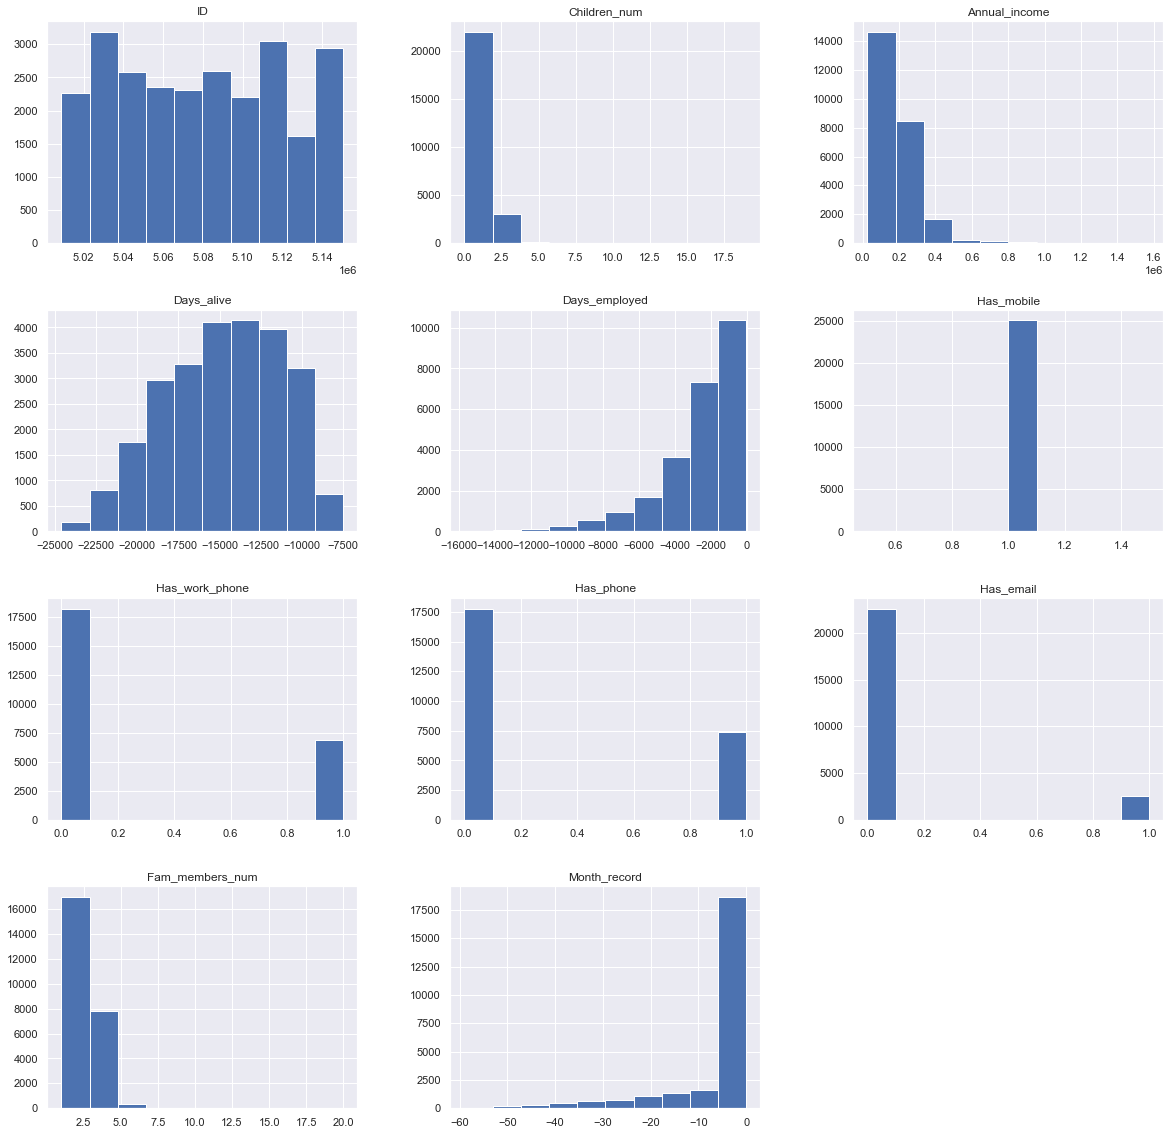

In [20]:
import matplotlib.pyplot as plt

# Histogram of each column
df.hist(figsize=(20,20))
plt.show()

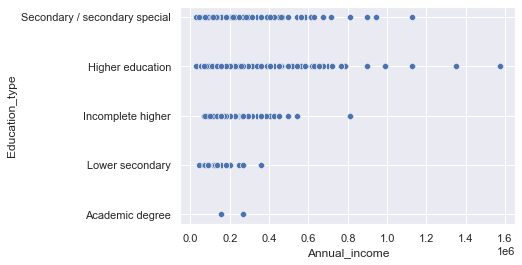

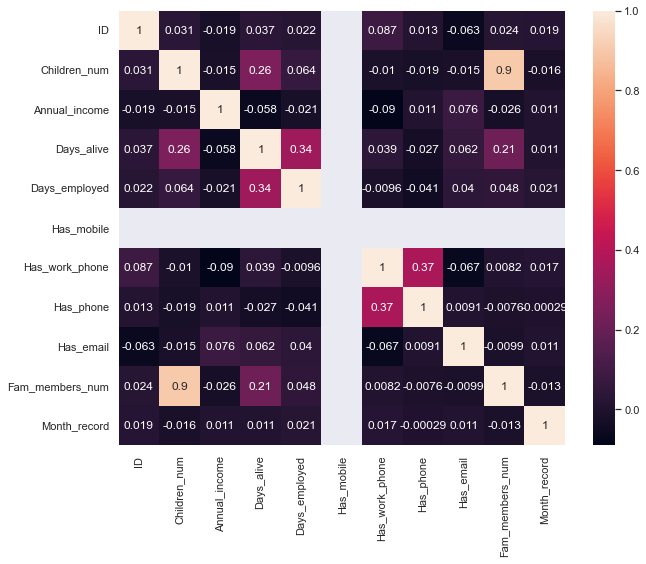

In [21]:
# Correlation between Income money & education type using scatter plots or a correlation matrix

# Scatter plot of two columns
sns.scatterplot(data=df, x='Annual_income', y='Education_type')

# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

#The correlation coefficient is a measure of the linear relationship between two variables and ranges from -1 to 1, where -1 represents a perfect negative correlation, 0 represents no correlation, and 1 represents a perfect positive correlation.

In [22]:
df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
31,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,0,C
61,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,0
66,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,-22,X
71,5008810,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,C
98,5008811,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,C


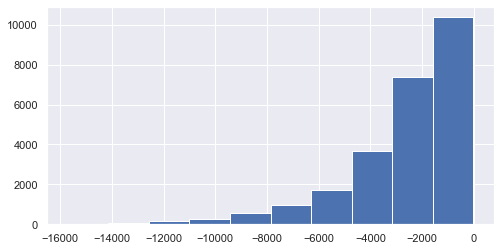

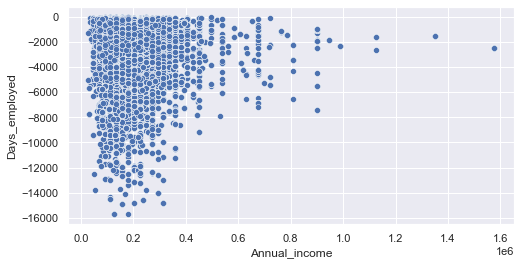

In [23]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Figure size
plt.figure(figsize=(8, 4))

# Histogram of the target variable
df['Days_employed'].hist()

# Figure size
plt.figure(figsize=(8, 4))

# Scatter plot of the target variable and one feature
sns.scatterplot(data=df, x='Annual_income', y='Days_employed')

plt.show()

## Replacing categorical variables with numerical values

In [24]:
df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
31,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,0,C
61,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,0
66,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,-22,X
71,5008810,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,C
98,5008811,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,C


In [25]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['Gender',
 'Owning_car',
 'Owning_realty',
 'Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type',
 'Credit_status']

### Getting all unique values for each object column 

In [26]:
unique_values = df["Gender"].unique()
unique_values

array(['M', 'F'], dtype=object)

In [27]:
unique_values = df["Owning_car"].unique()
unique_values

array(['Y', 'N'], dtype=object)

In [28]:
unique_values = df["Owning_realty"].unique()
unique_values

array(['Y', 'N'], dtype=object)

In [29]:
unique_values = df["Income_type"].unique()
unique_values

array(['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner'], dtype=object)

In [30]:
unique_values = df["Education_type"].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [31]:
unique_values = df["Family_status"].unique()
unique_values

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [32]:
unique_values = df["Housing_type"].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [33]:
unique_values = df["Occupation_type"].unique()
unique_values

array(['Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [34]:
unique_values = df["Credit_status"].unique()
unique_values

array(['C', '0', 'X', '1', '5', '4', '3', '2'], dtype=object)

In [35]:
df = df.replace({'M': 0, 'F': 1,
                 'N': 0, 'Y': 1,
                'Working': 0, 'State servant': 1, 'Commercial associate': 2, 'Pensioner': 3, 'Student': 4,
                'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4,
                'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4,
                'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 'With parents': 3, 'Office apartment': 4, 'Co-op apartment': 5,
                'Security staff': 0, 'Sales staff': 1, 'Accountants': 2, 'Laborers': 3, 'Managers': 4, 'Drivers': 5, 'Core staff': 6, 'High skill tech staff': 7, 'Cleaning staff': 8, 'Private service staff': 9, 'Cooking staff': 10, 'Low-skill Laborers': 11, 'Medicine staff': 12, 'Secretaries': 13, 'Waiters/barmen staff': 14, 'HR staff': 15, 'Realty agents': 16, 'IT staff': 17})
df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
31,5008806,0,1,1,0,112500.00,0,0,1,0,-21474,-1134,1,0,0,0,0,2.00,0,C
61,5008808,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,0,0
66,5008809,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,-22,X
71,5008810,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,0,C
98,5008811,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,0,C


### Identifying what is succesful candidate in "Credit_status" column

In [36]:
df['Credit_status'] = df['Credit_status'].replace(['1', '2', '3', '4', '5', 'X'], 1)
df['Credit_status'] = df['Credit_status'].replace(['0','C'], 0)

print(df['Credit_status'].unique())

[0 1]


## List of replacements in dataset

#### Gender
M: 0, F: 1

#### Owning_car
'N': 0, 'Y': 1

#### Owning_realty	
'N': 0, 'Y': 1

#### Income_type
'Working': 0, 'State servant': 1, 'Commercial associate': 2, 'Pensioner': 3, 'Student': 4

#### Education_type
'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4

#### Family_status
'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4

#### HOUSING_TYPE
House / apartment: 0, Rented apartment: 1, Municipal apartment: 2, With parents: 3, Office apartment: 4, Co-op apartment: 5

#### Has_mobile / Has_work_phone	/ Has_phone	/ Has_email	
'N': 0, 'Y': 1

#### Credit_status
0: 1-29 days past due, paid off that month - succesful candidate
#### 
1: 30-59 days past due, 60-89 days overdue, 90-119 days overdue, 120-149 days overdue, Overdue or bad debts, write-offs for more than 150 days, No loan for the month - unsuccesful candidate.	


### Our dataset is now completely filled with numerical values only

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 31 to 777701
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               25134 non-null  int64  
 1   Gender           25134 non-null  int64  
 2   Owning_car       25134 non-null  int64  
 3   Owning_realty    25134 non-null  int64  
 4   Children_num     25134 non-null  int64  
 5   Annual_income    25134 non-null  float64
 6   Income_type      25134 non-null  int64  
 7   Education_type   25134 non-null  int64  
 8   Family_status    25134 non-null  int64  
 9   Housing_type     25134 non-null  int64  
 10  Days_alive       25134 non-null  int64  
 11  Days_employed    25134 non-null  int64  
 12  Has_mobile       25134 non-null  int64  
 13  Has_work_phone   25134 non-null  int64  
 14  Has_phone        25134 non-null  int64  
 15  Has_email        25134 non-null  int64  
 16  Occupation_type  25134 non-null  int64  
 17  Fam_member

In [38]:
df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
31,5008806,0,1,1,0,112500.00,0,0,1,0,-21474,-1134,1,0,0,0,0,2.00,0,0
61,5008808,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,0,0
66,5008809,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,-22,1
71,5008810,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,0,0
98,5008811,1,0,1,0,270000.00,2,0,0,0,-19110,-3051,1,0,1,1,1,1.00,0,0


## Feature selection

In [39]:
feature_cols = ['Gender', 'Owning_car', 'Owning_realty', 'Annual_income','Income_type','Education_type','Family_status', 'Days_alive', 'Days_employed', 'Occupation_type', 'Fam_members_num', 'Month_record']
X = df[feature_cols]             
y = df.Credit_status               

print(X, y)

        Gender  Owning_car  Owning_realty  Annual_income  Income_type  \
31           0           1              1      112500.00            0   
61           1           0              1      270000.00            2   
66           1           0              1      270000.00            2   
71           1           0              1      270000.00            2   
98           1           0              1      270000.00            2   
...        ...         ...            ...            ...          ...   
777622       0           1              1      315000.00            0   
777634       1           0              1      157500.00            2   
777658       1           0              1      157500.00            3   
777691       1           0              1      283500.00            0   
777701       0           0              1      112500.00            0   

        Education_type  Family_status  Days_alive  Days_employed  \
31                   0              1      -21474      

### Splitting dataset into training set and test set (70% training and 30% test)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [41]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25134, 12), (25134,), (17593, 12), (7541, 12), (17593,), (7541,))

# Decision Tree Model

In [42]:
clsf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

clsf = clsf.fit(X_train, y_train)

y_pred = clsf.predict(X_test)

# Evaluating Model - how often is the classifier correct?

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7280201564779207


### Calculating Train and Test score

In [44]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.7323935656226909
Test set score: 0.7280201564779207


Scores are relatively close to each other and the difference between them is not significant. That means, it is less likely that the model is overfitting or underfitting. 

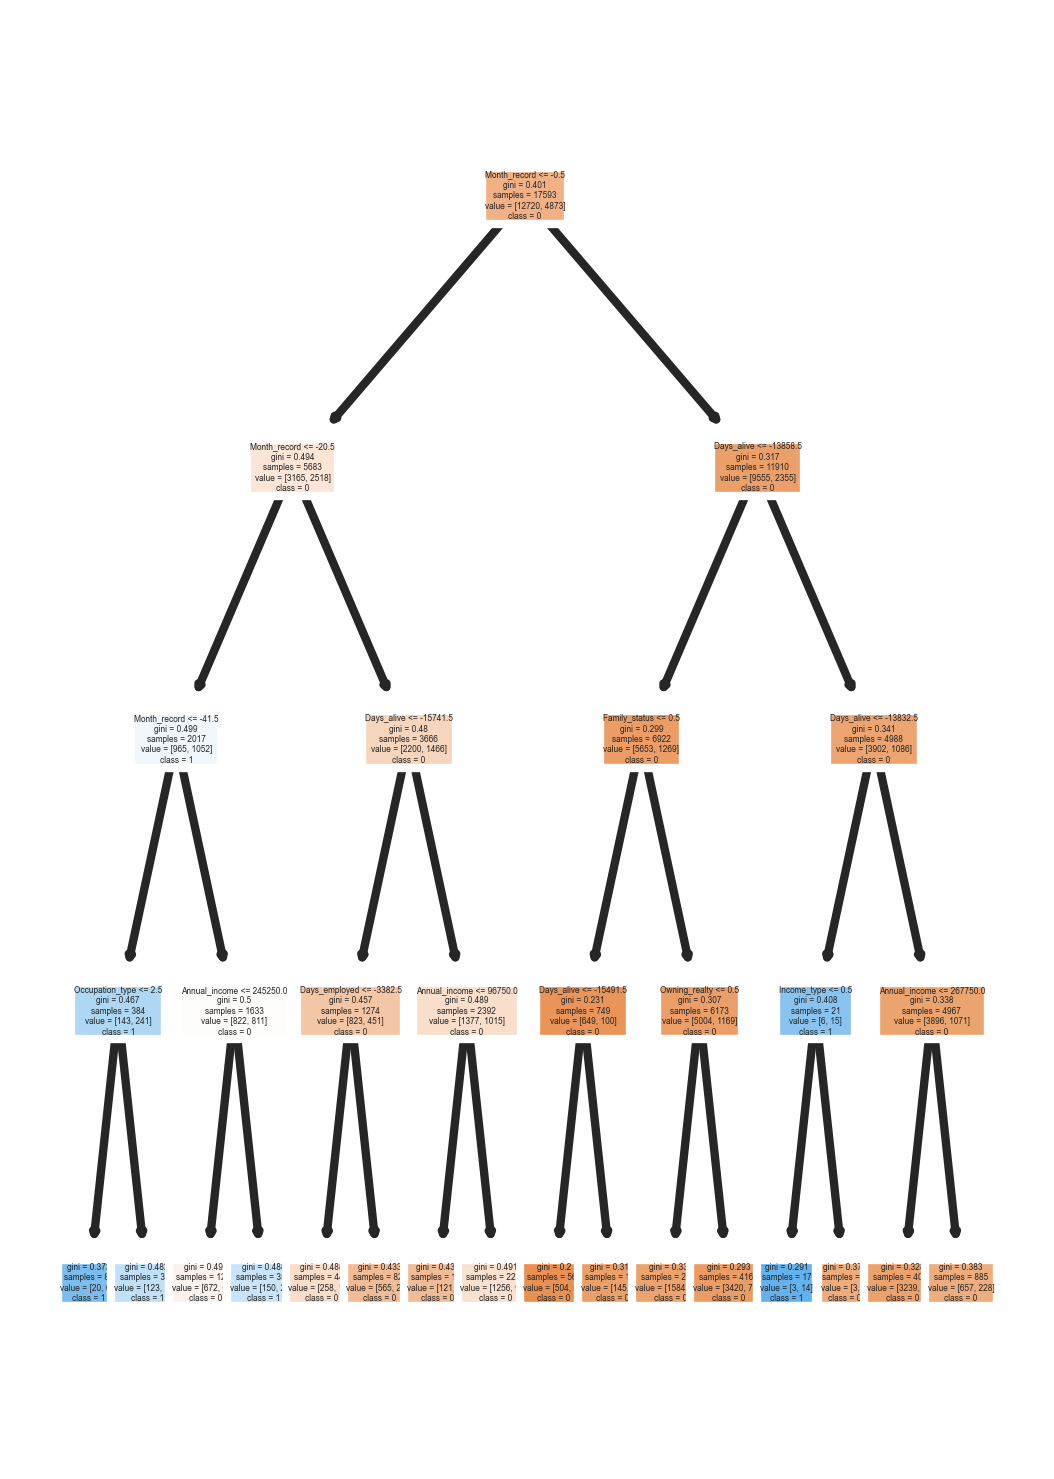

In [45]:
features = ['Gender', 'Owning_car', 'Owning_realty', 'Annual_income','Income_type','Education_type','Family_status', 'Days_alive', 'Days_employed', 'Occupation_type', 'Fam_members_num', 'Month_record']
classes = ['0','1']

# Making image more readable
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=600)

tree.plot_tree(clsf,
           feature_names = features, 
           class_names = classes,
           filled = True);

### Splitting dataset into training set and test set (80% training and 20% test)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [47]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25134, 12), (25134,), (20107, 12), (5027, 12), (20107,), (5027,))

In [48]:
clsf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

clsf = clsf.fit(X_train, y_train)

y_pred = clsf.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.722498508056495


In [50]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.7340229770726613
Test set score: 0.722498508056495


Again, scores are relatively close to each other and the difference is not significant. With increasing the training set ratio, it seems that model tends to go in underfitting way, but with very small change.

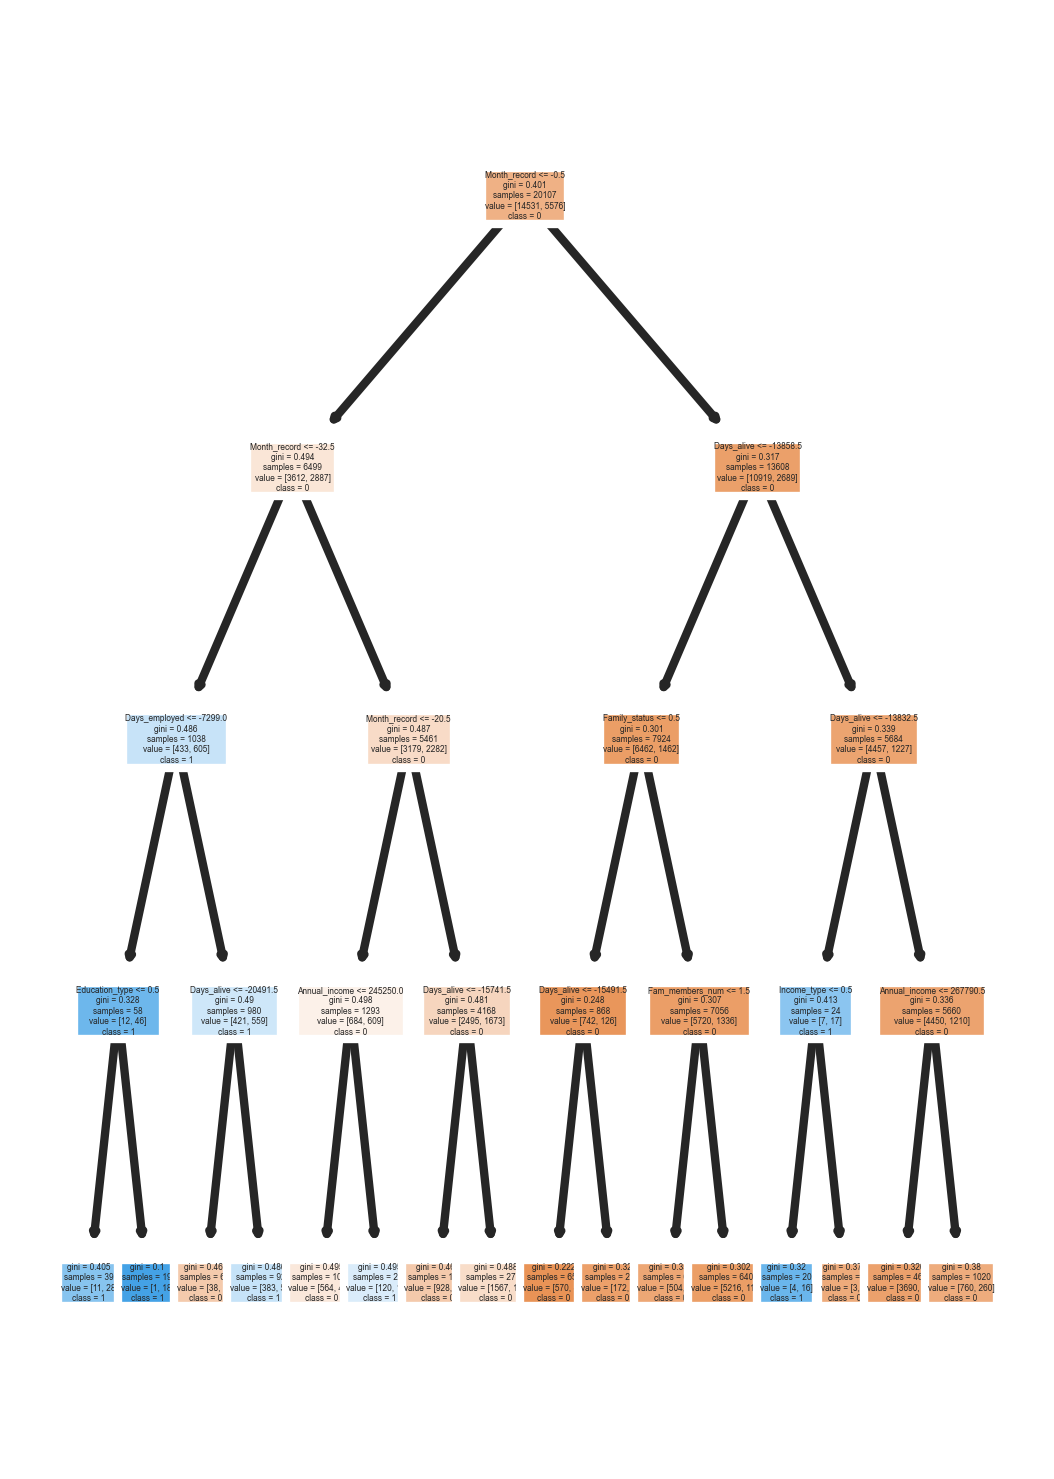

In [51]:
features = ['Gender', 'Owning_car', 'Owning_realty', 'Annual_income','Income_type','Education_type','Family_status', 'Days_alive', 'Days_employed', 'Occupation_type', 'Fam_members_num', 'Month_record']
classes = ['0','1']

# Making image more readable
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=600)

tree.plot_tree(clsf,
           feature_names = features, 
           class_names = classes,
           filled = True);

### Splitting dataset into training set and test set (90% training and 10% test)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [53]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25134, 12), (25134,), (22620, 12), (2514, 12), (22620,), (2514,))

In [54]:
clsf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

clsf = clsf.fit(X_train, y_train)

y_pred = clsf.predict(X_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7259347653142403


In [56]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.7321396993810787
Test set score: 0.7259347653142403


The same thing is happening with the last dataset - training and test scores are really close to each other, so no underfitting or overfitting.

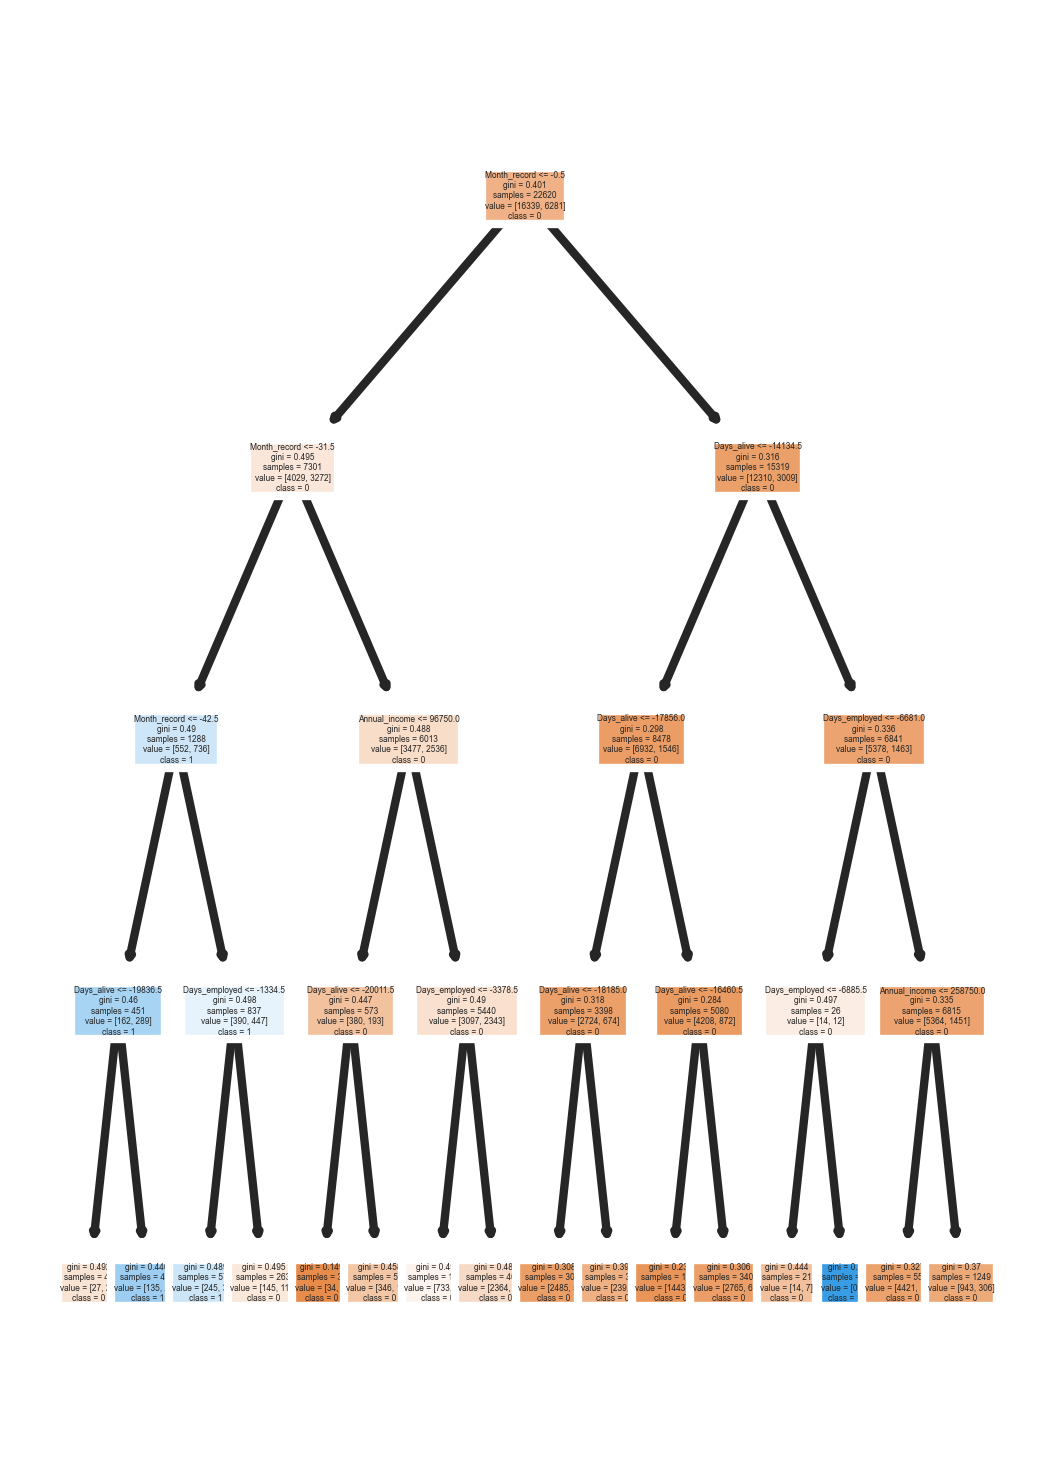

In [57]:
features = ['Gender', 'Owning_car', 'Owning_realty', 'Annual_income','Income_type','Education_type','Family_status', 'Days_alive', 'Days_employed', 'Occupation_type', 'Fam_members_num', 'Month_record']
classes = ['0','1']

# Making image more readable
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=600)

tree.plot_tree(clsf,
           feature_names = features, 
           class_names = classes,
           filled = True);

### I will normalize the data now by using MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler

# define the scaler
scaler = MinMaxScaler()

# apply Min-Max scaling to the entire dataframe
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [59]:
df.head()

,ID,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record,Credit_status
0,0.00,0.00,1.00,1.00,0.00,0.06,0.00,0.00,0.25,0.00,0.18,0.93,0.00,0.00,0.00,0.00,0.00,0.05,1.00,0.00
1,0.00,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,1.00,0.00
2,0.00,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,0.63,1.00
3,0.00,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,1.00,0.00
4,0.00,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,1.00,0.00


# PCA

In [62]:
cardnolabel = df.drop(columns=['ID', 'Credit_status'])
cardnolabel

,Gender,Owning_car,Owning_realty,Children_num,Annual_income,Income_type,Education_type,Family_status,Housing_type,Days_alive,Days_employed,Has_mobile,Has_work_phone,Has_phone,Has_email,Occupation_type,Fam_members_num,Month_record
0,0.00,1.00,1.00,0.00,0.06,0.00,0.00,0.25,0.00,0.18,0.93,0.00,0.00,0.00,0.00,0.00,0.05,1.00
1,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,1.00
2,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,0.63
3,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,1.00
4,1.00,0.00,1.00,0.00,0.16,0.50,0.00,0.00,0.00,0.32,0.81,0.00,0.00,1.00,1.00,0.06,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,0.00,1.00,1.00,0.00,0.19,0.00,0.00,0.25,0.00,0.42,0.85,0.00,0.00,0.00,0.00,0.24,0.05,1.00
25130,1.00,0.00,1.00,0.00,0.08,0.50,0.25,0.25,0.00,0.71,0.92,0.00,0.00,1.00,1.00,0.71,0.05,1.00
25131,1.00,0.00,1.00,0.00,0.08,0.75,0.25,0.25,0.00,0.71,0.92,0.00,0.00,1.00,1.00,0.71,0.05,1.00
25132,1.00,0.00,1.00,0.00,0.17,0.00,0.00,0.25,0.00,0.39,0.96,0.00,0.00,0.00,0.00,0.06,0.05,1.00


Text(0, 0.5, 'cumulative explained variance')

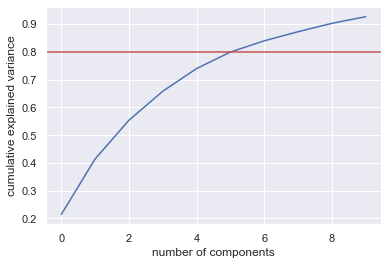

In [63]:
pca = PCA(10).fit(cardnolabel)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### In the class, we were told that 70% of variances explained is good percentage so I'm taking 4 components.

In [64]:
pca = PCA(n_components=4)
projected = pca.fit_transform(cardnolabel)
projected.shape

(25134, 4)